In [28]:
import time
from rtlsdr import *
import matplotlib.pyplot as plt
import numpy as np

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.0e6
sdr.center_freq = 915e6
sdr.gain = 4


start_time = time.time_ns()
f = open(f"./rtlsdr_rssi_{start_time}.csv", "a")
f.writelines(f"received_time, rssi\n")
for i in range(5):
    try:
        results_list = [[],[]]
        for i in range(1000):
            samples = sdr.read_samples()
            # use matplotlib to estimate and plot the PSD
            results = plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
            results_list[0].append(time.time_ns())
            results_list[1].append(10*np.log10(np.mean(results[0][384:641])))
        for i in range(len(results_list[0])):
            f.writelines(str(results_list[0][i])+", "+str(results_list[1][i])+"\n")
    except Exception as e:
        print(e)
        sdr.close()
        sdr = RtlSdr()

    finally:
        sdr.close()


Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz


: 

: 

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz


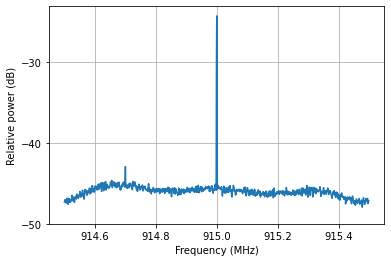

In [2]:
from pylab import *
from rtlsdr import *

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.0e6
sdr.center_freq = 915e6
sdr.gain = 4

samples = sdr.read_samples(256*1024)
sdr.close()

# use matplotlib to estimate and plot the PSD
results = psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()

In [19]:
import time
from tqdm import tqdm
from pylab import *
from rtlsdr import *

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz
 46%|████▌     | 4607/10000 [00:47<00:55, 97.76it/s] 


KeyboardInterrupt: 

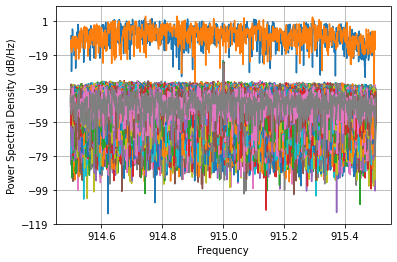

In [20]:

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.0e6
sdr.center_freq = 915e6
sdr.gain = 4

results_list = [[],[]]

for i in tqdm(range(10000)):
    samples = sdr.read_samples()
    # use matplotlib to estimate and plot the PSD
    results = psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
    results_list[0].append(time.time())
    results_list[1].append(10*np.log10(np.mean(results[0][384:641])))


sdr.close()

In [11]:
# from matplotlib.mlab import psd
# sdr = RtlSdr()

# # configure device
# sdr.sample_rate = 1.0e6
# sdr.center_freq = 915e6
# sdr.gain = 4

# results_list = [[],[]]

# samples = sdr.read_samples()
# # use matplotlib to estimate and plot the PSD
# power, psd_frequencies = psd(samples, NFFT=256, Fs=sdr.sample_rate)
# psd_frequencies += sdr.center_freq

# results_psd = [power,psd_frequencies]
# print(results_psd)
# sdr.close()

Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 1000000.026491 Hz


[array([2.67579907e-12, 1.45107733e-12, 2.70664502e-12, 3.85546459e-12,
       3.90279046e-12, 2.91947111e-12, 1.47175849e-12, 1.38612219e-12,
       1.46919997e-12, 1.24949228e-12, 9.52592568e-13, 1.38025175e-12,
       1.68543335e-12, 7.98731327e-13, 3.04511351e-12, 2.43918763e-12,
       1.13313621e-12, 1.07314833e-12, 2.59290309e-12, 3.31636044e-12,
       2.50199417e-12, 7.11863571e-13, 2.85515912e-12, 5.63746624e-12,
       2.92911040e-12, 3.22307201e-12, 2.53076884e-12, 2.59468518e-12,
       2.61518552e-12, 3.10124982e-12, 4.34743588e-12, 2.02962677e-12,
       2.06109814e-12, 5.11351195e-12, 3.20807133e-12, 2.20311897e-12,
       3.46732667e-12, 3.14917079e-12, 2.85478952e-12, 2.09345166e-12,
       2.25859664e-12, 5.63110117e-12, 4.39978628e-12, 1.70613583e-12,
       5.69754958e-13, 3.09615636e-12, 6.60549349e-12, 5.25890294e-12,
       1.77796699e-12, 2.39274541e-12, 4.75659309e-12, 4.39913592e-12,
       3.15632493e-12, 1.37185590e-12, 2.97994024e-12, 3.25344138e-12,
     

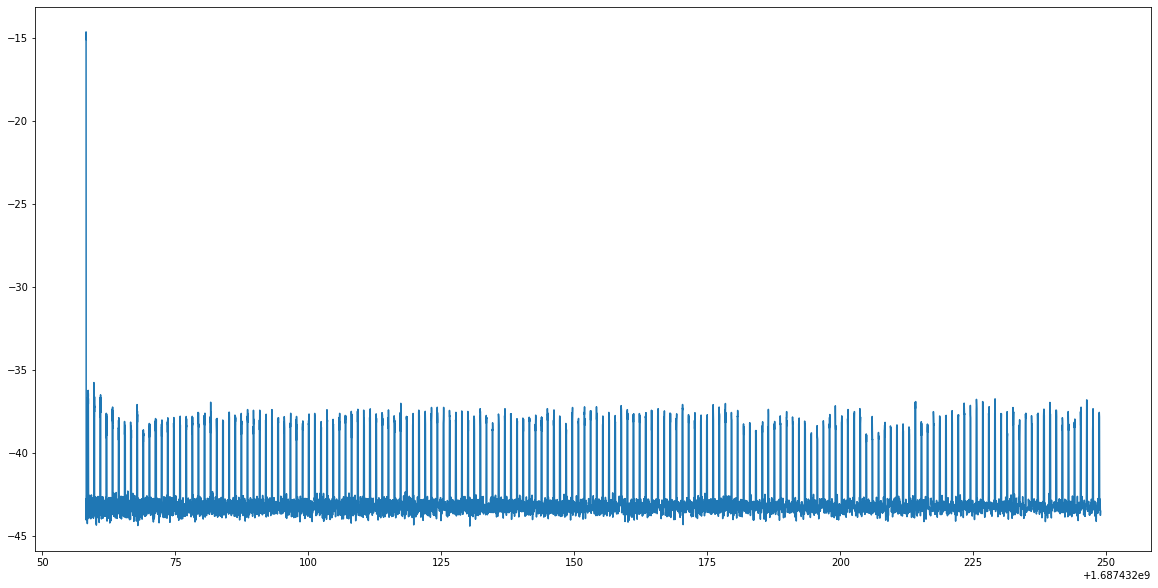

In [22]:
plt.figure(figsize=(20,10))
plt.plot(results_list[0], results_list[1])

In [19]:
f = open("rssi.csv", "a")
for i in range(len(results_list[0])):
    f.writelines(str(results_list[0][i])+", "+str(results_list[1][i])+"\n")
f.close()

#open and read the file after the appending:
f = open("rssi.csv", "r")
print(f.read())

1687362359.276834, -39.309990863163414
1687362359.280042, -39.45791483752811
1687362359.28328, -43.405813255898025
1687362359.2863429, -43.502019931782485
1687362359.2893262, -43.093926258401694
1687362359.2925818, -43.34258666098387
1687362359.29565, -43.173569088540674
1687362359.29872, -43.340142805553555
1687362359.302065, -42.90176546701366
1687362359.3054879, -42.8739993270291
1687362359.3089228, -43.188790147205836
1687362359.313279, -43.131227813623624
1687362359.3165472, -43.57128390342184
1687362359.3202639, -43.43912647100317
1687362359.3231459, -43.211101273423004
1687362359.32797, -43.59180227176963
1687362359.331174, -43.35902507335105
1687362359.334868, -43.49882641644926
1687362359.33856, -43.00317605536725
1687362359.341711, -43.13629358229156
1687362359.344656, -43.46997382273478
1687362359.34992, -43.31470298452998
1687362359.3528378, -43.283915567700845
1687362359.355825, -43.266725918909984
1687362359.360163, -42.93236969262499
1687362359.3641732, -42.9880652346171

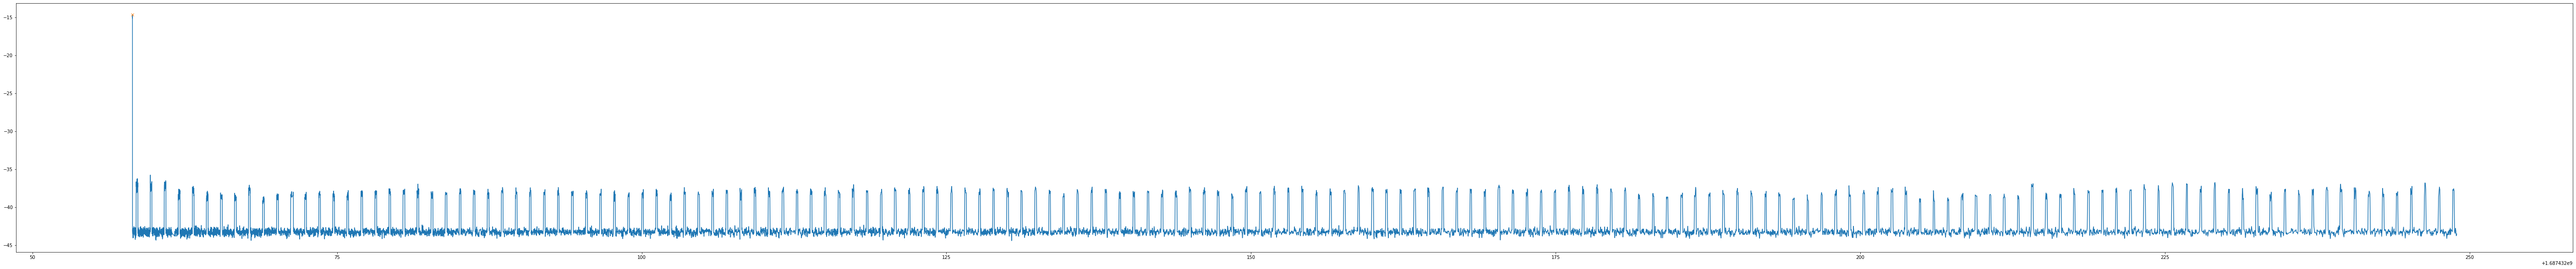

In [23]:
import scipy
peaks, _ = scipy.signal.find_peaks(results_list[1], height=-25)
plt.figure(figsize=(100,10))
plt.plot(results_list[0], results_list[1])
plt.plot([results_list[0][i] for i in peaks], [results_list[1][i] for i in peaks], "x")


In [15]:
import csv
f = open("rssi.csv", "r")
data = list(csv.reader(f, delimiter=","))
f.close()

for i in range(len(data)):
    data[i][0] = float(data[i][0])
    data[i][1] = float(data[i][1])
data_result = [[row[0] for row in data], [row[1] for row in data]]
data_result

[[1687362359.276834,
  1687362359.280042,
  1687362359.28328,
  1687362359.2863429,
  1687362359.2893262,
  1687362359.2925818,
  1687362359.29565,
  1687362359.29872,
  1687362359.302065,
  1687362359.3054879,
  1687362359.3089228,
  1687362359.313279,
  1687362359.3165472,
  1687362359.3202639,
  1687362359.3231459,
  1687362359.32797,
  1687362359.331174,
  1687362359.334868,
  1687362359.33856,
  1687362359.341711,
  1687362359.344656,
  1687362359.34992,
  1687362359.3528378,
  1687362359.355825,
  1687362359.360163,
  1687362359.3641732,
  1687362359.3680289,
  1687362359.3708658,
  1687362359.37376,
  1687362359.37761,
  1687362359.380723,
  1687362359.383986,
  1687362359.386831,
  1687362359.389636,
  1687362359.3926709,
  1687362359.395951,
  1687362359.399456,
  1687362359.402587,
  1687362359.405919,
  1687362359.4092212,
  1687362359.412456,
  1687362359.416045,
  1687362359.418748,
  1687362359.421389,
  1687362359.424117,
  1687362359.426774,
  1687362359.4296231,
  1687

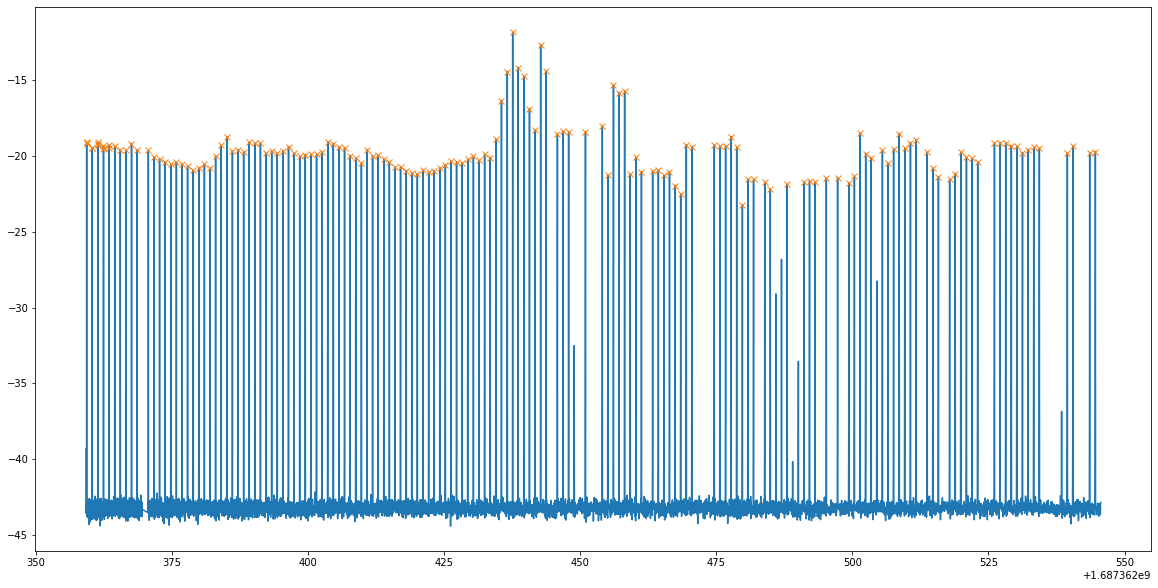

In [18]:
import scipy
import matplotlib.pyplot as plt
peaks, _ = scipy.signal.find_peaks(data_result[1], height=-25)
plt.figure(figsize=(20,10))
plt.plot(data_result[0], data_result[1])
plt.plot([data_result[0][i] for i in peaks], [data_result[1][i] for i in peaks], "x")

In [14]:
data

[[1687362359.276834, -39.309990863163414],
 [1687362359.280042, -39.45791483752811],
 [1687362359.28328, -43.405813255898025],
 [1687362359.2863429, -43.502019931782485],
 [1687362359.2893262, -43.093926258401694],
 [1687362359.2925818, -43.34258666098387],
 [1687362359.29565, -43.173569088540674],
 [1687362359.29872, -43.340142805553555],
 [1687362359.302065, -42.90176546701366],
 [1687362359.3054879, -42.8739993270291],
 [1687362359.3089228, -43.188790147205836],
 [1687362359.313279, -43.131227813623624],
 [1687362359.3165472, -43.57128390342184],
 [1687362359.3202639, -43.43912647100317],
 [1687362359.3231459, -43.211101273423004],
 [1687362359.32797, -43.59180227176963],
 [1687362359.331174, -43.35902507335105],
 [1687362359.334868, -43.49882641644926],
 [1687362359.33856, -43.00317605536725],
 [1687362359.341711, -43.13629358229156],
 [1687362359.344656, -43.46997382273478],
 [1687362359.34992, -43.31470298452998],
 [1687362359.3528378, -43.283915567700845],
 [1687362359.355825, -